In [3]:
import gower
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist as pdist
from scipy.spatial.distance import squareform as sf
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [4]:
# load the daataset and remove the last two columns
dataset = pd.read_csv('dataset.csv', sep = ";", decimal=",")
dataset = dataset.iloc[:, 1:-2]

In [4]:
[N,M] = np.shape(dataset)  
PAL = ['green', 'blue', 'yellow', 'orange', 'purple', 'magenta', 'cyan', 'brown', 'black', 'red']

In [81]:
dist_matrix = gower.gower_matrix(dataset)
labels = LocalOutlierFactor(n_neighbors=10, metric='precomputed', contamination=0.03)
labels.fit_predict(dist_matrix)
labels.negative_outlier_factor_

array([-1.7587101, -1.0128562, -1.138191 , ..., -1.1771091, -0.9908592,
       -1.0119542], dtype=float32)

In [88]:
# Apply the algorithm
from sklearn.neighbors import NearestNeighbors as knn

neighborhood_order = 10                   # this number should be coherent with the MINSAMPLES parameter
neighborhood_set = knn(n_neighbors=neighborhood_order).fit(dist_matrix)             # Note that in the nearest neighbour calculation, the point itself will appear as the first nearest neighbour
distances, indices = neighborhood_set.kneighbors(dist_matrix)

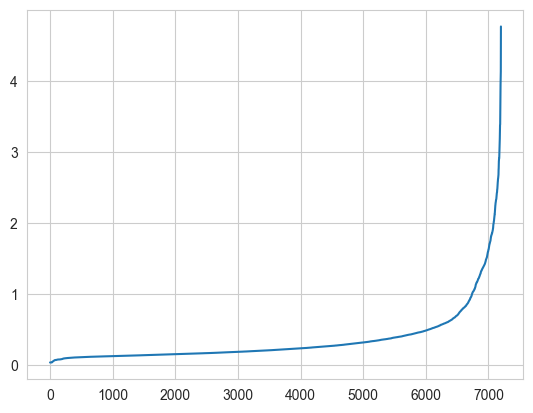

In [89]:
plt.plot(np.sort(distances[:,neighborhood_order-1]))

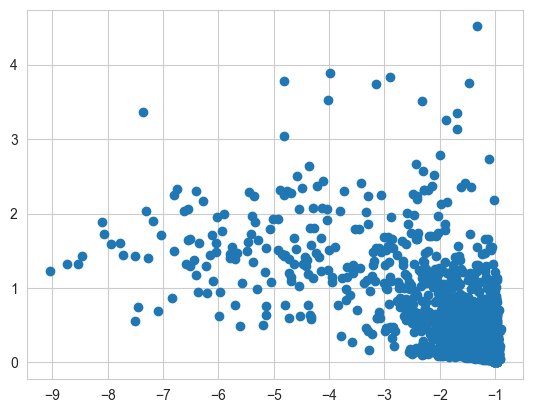

In [87]:
plt.scatter(labels.negative_outlier_factor_, distances[:,neighborhood_order-1])

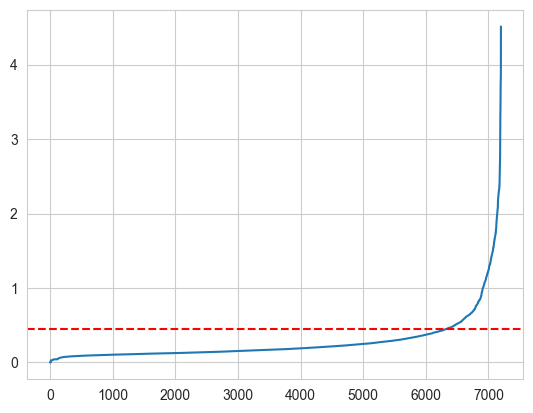

In [103]:
from kneed import KneeLocator

neighborhood_order = 5
dist_matrix = gower.gower_matrix(dataset)
# Apply the algorithm
neighborhood_set = knn(n_neighbors=neighborhood_order).fit(dist_matrix)
distances, indices = neighborhood_set.kneighbors(dist_matrix)

i = np.arange(len(distances))
knee = KneeLocator(i, np.sort(distances[:, -1]), S=1, curve='convex', direction='increasing',
                   interp_method='polynomial')

knee_x = knee.knee  # x coordinate of the knee point
knee_y = knee.knee_y  # y coordinate of the knee point

plt.plot(np.sort(distances[:,neighborhood_order-1]))
# horizontal line
plt.axhline(knee_y, color='red', linestyle='--')
plt.show()

In [105]:
print('[KNEE] The estimated best eps value is = %.2f' % knee_y, knee_x)

outliers = np.where(distances[:, neighborhood_order - 1] > knee_y)[0]
print('[KNEE] Number of outliers: %d' % len(outliers))

# Assign labels
kneeLabels = np.zeros(len(dataset))
kneeLabels[outliers] = -1

[KNEE] The estimated best eps value is = 0.45 6336
[KNEE] Number of outliers: 863


In [109]:
# load data from .csv
df = pd.read_csv('outliers.csv')

(array([6.8496447 , 0.79473514, 0.18087855, 0.06104651, 0.09043928,
        0.10852713, 0.05426357]),
 array([0.        , 0.12285714, 0.24571429, 0.36857143, 0.49142857,
        0.61428571, 0.73714286, 0.86      ]),
 <BarContainer object of 7 artists>)

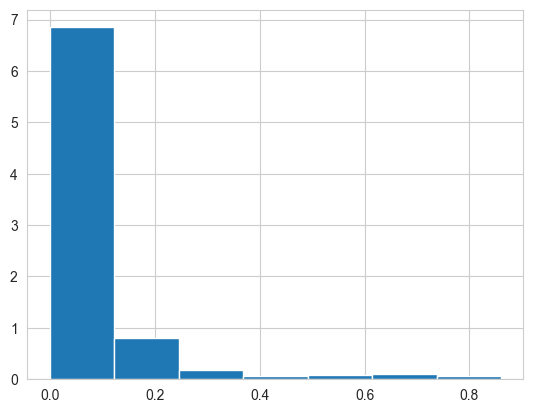

In [117]:
# plot the normnalized histogram of the outliers
plt.hist(df['Outliers'], bins=7, density=True)

[PCA] Explained variance ratio:  [0.55992824 0.27381146 0.06282584 0.02980638 0.02187945 0.01663685]


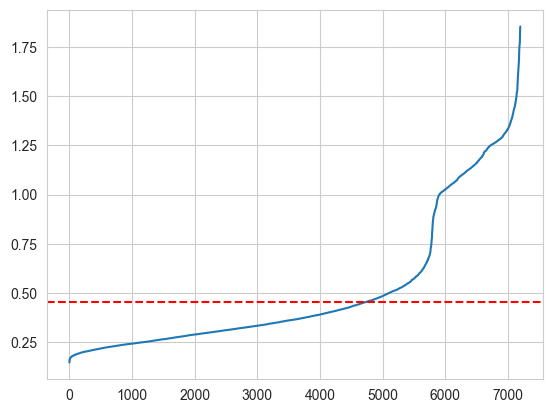

[PCA] found 2443


In [112]:
from gower import gower_matrix

# Compute Gower distance matrix for the entire dataset
gower_dist_matrix = gower_matrix(dataset)

# Perform PCA
pca = PCA(n_components=6)
pca_results = pca.fit_transform(gower_dist_matrix)

# print PCA explained variance ratio
print('[PCA] Explained variance ratio: ', pca.explained_variance_ratio_)

# Compute the reconstruction error for every data point
X_reconstructed = pca.inverse_transform(pca_results)
RE = np.linalg.norm(gower_dist_matrix - X_reconstructed, axis=1)

# Identify outliers using RE
i = np.arange(len(RE))
knee = KneeLocator(i, np.sort(RE), S=1, curve='convex', direction='increasing',
                   interp_method='polynomial')

knee_x = knee.knee
knee_y = knee.knee_y

plt.plot(np.sort(RE))
plt.axhline(knee_y, color='red', linestyle='--')
plt.show()

threshold = knee_y
outliers = np.where(RE > threshold)
print('[PCA] found %d' % len(outliers[0]))
pcaLabels = np.zeros(len(dataset))
pcaLabels[outliers] = -1


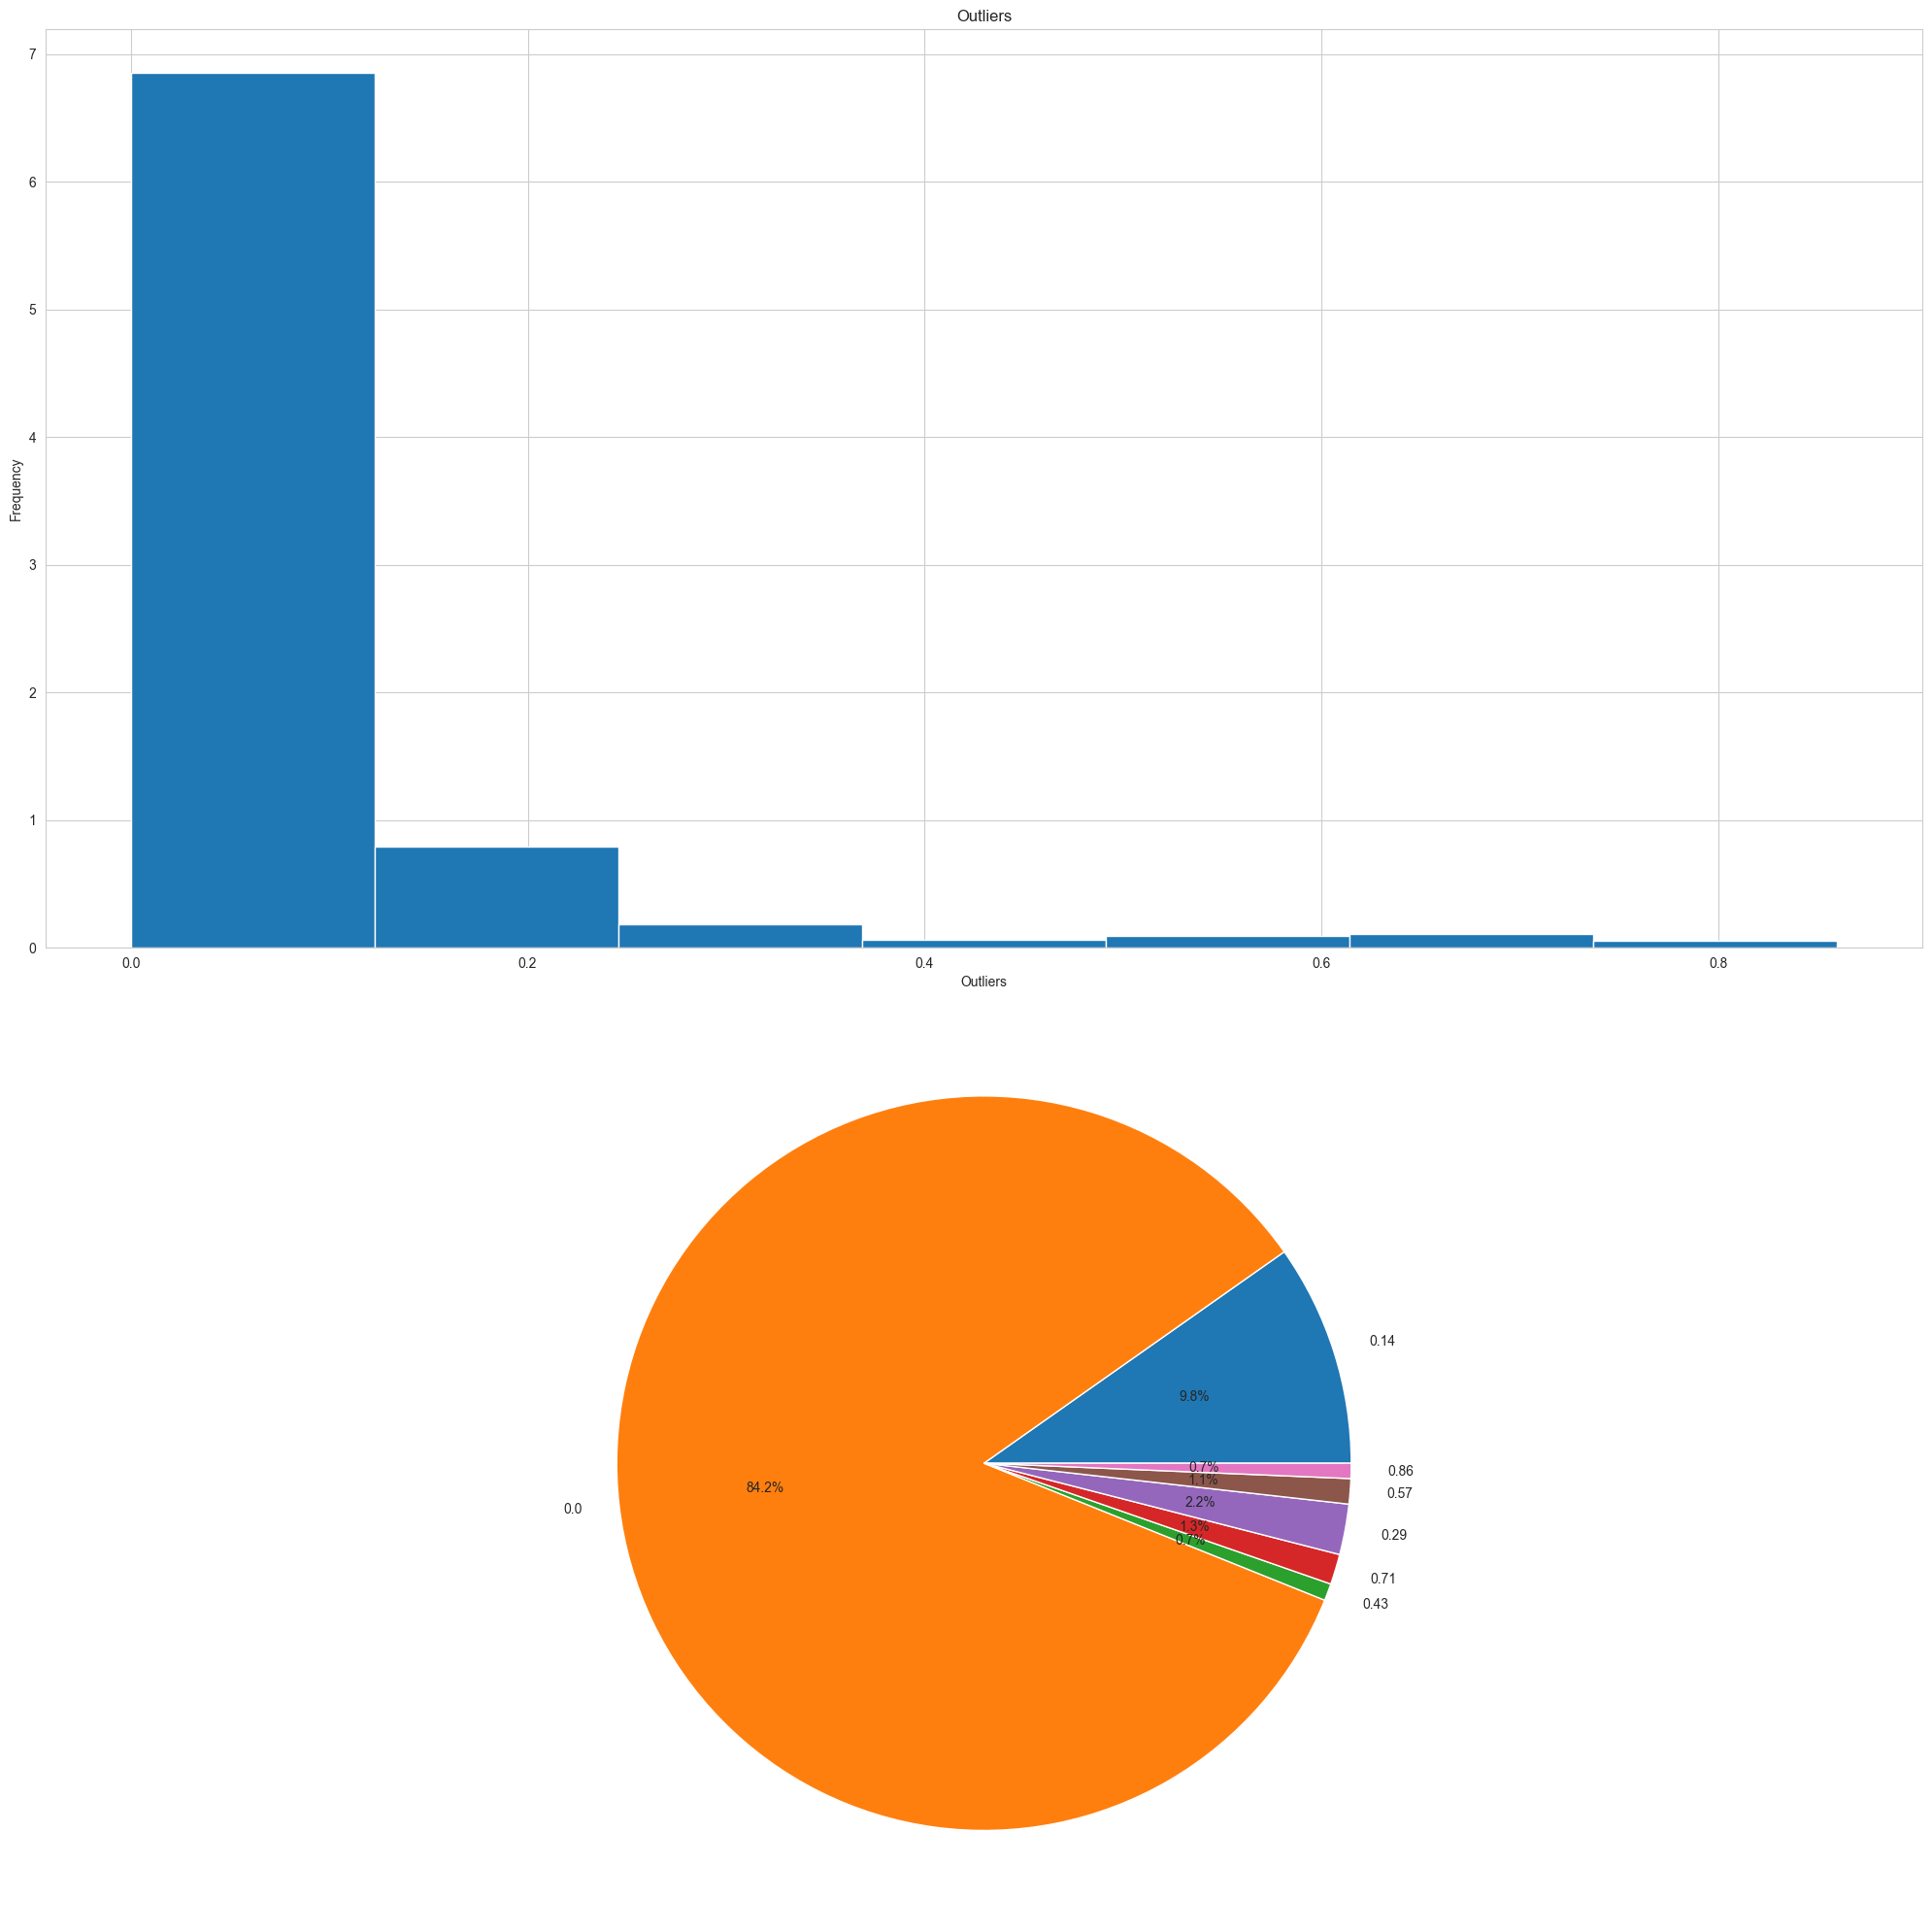

In [127]:
fig, axs = plt.subplots(2, figsize=(20, 20))


# Plot histogram
axs[0].hist(df['Outliers'], bins=7, density=True)
axs[0].set_title('Outliers')
axs[0].set_xlabel('Outliers')
axs[0].set_ylabel('Frequency')

# Plot pie chart
levels = set(df['Outliers'])
sizes = [len(df[df['Outliers'] == level]) for level in levels]
axs[1].pie(sizes, labels=levels, autopct='%1.1f%%')

plt.tight_layout()
plt.savefig("media/outliersFrequency.png")
plt.show()
plt.close()